## Decision Trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.DataFrame({
    "sarjana": [0,0,0,1,1,1],
    "diterima" : [0,0,1,0,1,1]
})

Root Node : Starting question <br>
Internal Node : Question branch <br>
Leaves : Conclusion

In [5]:
df

,sarjana,diterima
0,0,0
1,0,0
2,0,1
3,1,0
4,1,1
5,1,1


<hr>

### Gini Impurity

- Count gini for each leaf in every feature: gini __S1True__ & __S1 False__
- Gini = 1 -  (probability TRUE) $^2$ - (probability FALSE) $^2$
- Count Total Gini for each feature : __giniS1__

In [8]:
giniS1True = 1 - (2/3)**2 - (1/3)**2
giniS1False = 1 - (1/3)**2 - (2/3)**2
giniS1True, giniS1False

(0.4444444444444445, 0.4444444444444444)

In [10]:
giniS1 = giniS1True * (3/6) + giniS1False * (3/6)
giniS1

0.4444444444444444

In [12]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(df[["sarjana"]], df["diterima"])
model.predict([[0]])[0]

0

[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(83.7, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]')]

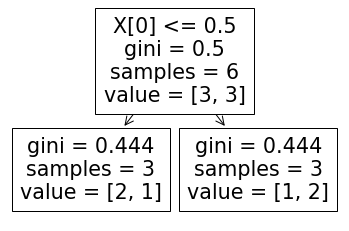

In [13]:
tree.plot_tree(model.fit(df[["sarjana"]], df["diterima"]))

In [15]:
tree.export_graphviz(model.fit(df[["sarjana"]], df["diterima"]), 
                     out_file = "decision.dot", feature_names= ["Sarjana"],
                    class_names = ["Diterima", "Ditolak"])

Akan menghasilkan file "decision.dot" yang bisa ditampilkan dalam bentuk graphic by coding atau online

![decisiontree](./graphviz.png)

<hr>

### Entropy & Gain

- Count Entropy for each leaf in every feature : __EnS1True__ & __EnS1False__
- Entropy = $ \displaystyle \sum -p_i \cdot log_2 (p_i) $
- Gain = E - E.feature

In [18]:
EnS1TrueAccTrue = -1 * (2/3) * np.log2(2/3)
EnS1TrueAccFalse = -1 * (1/3) * np.log2(1/3)
TotalEnS1True = EnS1TrueAccTrue + EnS1TrueAccFalse
EnS1TrueAccTrue, EnS1TrueAccFalse, TotalEnS1True

(0.38997500048077083, 0.5283208335737187, 0.9182958340544896)

In [19]:
EnS1FalseAccTrue = -1 * (1/3) * np.log2(1/3)
EnS1FalseAccFalse = -1 * (2/3) * np.log2(2/3)
TotalEnS1False = EnS1FalseAccTrue + EnS1FalseAccFalse
EnS1FalseAccTrue, EnS1FalseAccFalse, TotalEnS1False

(0.5283208335737187, 0.38997500048077083, 0.9182958340544896)

In [20]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion= "entropy")
model.fit(df[["sarjana"]], df["diterima"])
model.predict([[0]])[0]

0

[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]')]

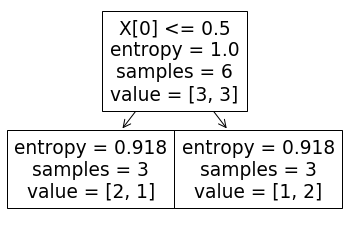

In [21]:
tree.plot_tree(model.fit(df[["sarjana"]], df["diterima"]))